In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
from matplotlib.patches import Rectangle
import multiprocessing as mp
import time
import glob
import re
import random
from sklearn.model_selection import train_test_split
import torch

sys.path.insert(0, '/Data/user/panhailin/code/git_lab/npspy/')
import npspy as nps

In [2]:
clean_cm_df = pd.read_csv("../../../04.tables/classification_for_real_data/hp12/hp12_cm.csv", index_col=0)
clean_cm_df.index.name = 'true'
clean_cm_df.columns.name = 'pred'
clean_cm_df

pred,hp1_1,hp1_2,hp1_3,hp1_4,hp1_5,hp1_6,hp1_7,hp1_8,hp1_9,hp2_1,hp2_2,hp2_3,hp2_4,hp2_5,hp2_6
true,,,,,,,,,,,,,,,
hp1_1,5525,37,16,9,51,5,0,4,3,2,10,15,12,2,309
hp1_2,77,5680,10,9,13,11,0,0,17,3,0,1,4,2,173
hp1_3,23,11,5709,6,21,26,2,44,99,5,3,10,11,12,18
hp1_4,25,20,15,5595,10,84,2,15,28,76,8,6,7,7,102
hp1_5,41,5,8,1,5861,6,2,0,6,0,2,5,46,3,14
hp1_6,10,2,41,60,21,5565,1,86,100,40,8,12,16,20,18
hp1_7,5,7,13,3,7,11,5825,1,8,7,19,68,13,8,5
hp1_8,8,0,39,20,2,119,0,5673,112,9,2,0,0,4,12
hp1_9,11,9,91,12,10,75,3,81,5646,8,6,7,4,20,17


In [4]:
valid_cm_df = pd.read_csv("../../../03.results/classification_on_clean_data/hp12/diff_data_size/valid/valid_data_ds_25000_cm.csv", index_col=0)
valid_cm_df.columns.name= 'pred'
valid_cm_df.index.name = 'true'
valid_cm_df

pred,hp1_1,hp1_2,hp1_3,hp1_4,hp1_5,hp1_6,hp1_7,hp1_8,hp1_9,hp2_1,hp2_2,hp2_3,hp2_4,hp2_5,hp2_6
true,,,,,,,,,,,,,,,
hp1_1,5471,52,12,8,40,2,2,4,6,4,34,14,17,3,331
hp1_2,91,5588,9,17,11,9,4,6,12,14,6,13,9,0,211
hp1_3,28,14,5655,14,12,36,4,45,100,15,5,20,6,24,22
hp1_4,17,29,4,5500,6,90,4,20,14,106,15,20,8,17,150
hp1_5,50,12,10,16,5756,10,6,3,6,0,13,25,72,6,15
hp1_6,13,5,31,95,20,5485,5,110,108,46,7,18,6,32,19
hp1_7,5,8,8,12,6,6,5755,1,13,12,23,122,15,6,8
hp1_8,14,1,32,35,3,133,2,5585,145,12,10,2,0,11,15
hp1_9,17,18,92,25,11,95,5,91,5537,15,14,21,11,29,19


In [5]:
clean_cm_df = clean_cm_df.div(clean_cm_df.sum(axis=1), axis=0)*100
valid_cm_df = valid_cm_df.div(valid_cm_df.sum(axis=1), axis=0)*100

In [6]:
diff_df = clean_cm_df - valid_cm_df
diff_df

pred,hp1_1,hp1_2,hp1_3,hp1_4,hp1_5,hp1_6,hp1_7,hp1_8,hp1_9,hp2_1,hp2_2,hp2_3,hp2_4,hp2_5,hp2_6
true,,,,,,,,,,,,,,,
hp1_1,0.900000,-0.250000,0.066667,0.016667,0.183333,0.050000,-0.033333,0.000000,-0.050000,-0.033333,-0.400000,0.016667,-0.083333,-0.016667,-0.366667
hp1_2,-0.233333,1.533333,0.016667,-0.133333,0.033333,0.033333,-0.066667,-0.100000,0.083333,-0.183333,-0.100000,-0.200000,-0.083333,0.033333,-0.633333
hp1_3,-0.083333,-0.050000,0.900000,-0.133333,0.150000,-0.166667,-0.033333,-0.016667,-0.016667,-0.166667,-0.033333,-0.166667,0.083333,-0.200000,-0.066667
hp1_4,0.133333,-0.150000,0.183333,1.583333,0.066667,-0.100000,-0.033333,-0.083333,0.233333,-0.500000,-0.116667,-0.233333,-0.016667,-0.166667,-0.800000
hp1_5,-0.150000,-0.116667,-0.033333,-0.250000,1.750000,-0.066667,-0.066667,-0.050000,0.000000,0.000000,-0.183333,-0.333333,-0.433333,-0.050000,-0.016667
hp1_6,-0.050000,-0.050000,0.166667,-0.583333,0.016667,1.333333,-0.066667,-0.400000,-0.133333,-0.100000,0.016667,-0.100000,0.166667,-0.200000,-0.016667
hp1_7,0.000000,-0.016667,0.083333,-0.150000,0.016667,0.083333,1.166667,0.000000,-0.083333,-0.083333,-0.066667,-0.900000,-0.033333,0.033333,-0.050000
hp1_8,-0.100000,-0.016667,0.116667,-0.250000,-0.016667,-0.233333,-0.033333,1.466667,-0.550000,-0.050000,-0.133333,-0.033333,0.000000,-0.116667,-0.050000
hp1_9,-0.100000,-0.150000,-0.016667,-0.216667,-0.016667,-0.333333,-0.033333,-0.166667,1.816667,-0.116667,-0.133333,-0.233333,-0.116667,-0.150000,-0.033333


In [12]:
np.max(diff_df), np.min(diff_df)

(np.float64(2.450000000000017), np.float64(-0.8999999999999999))

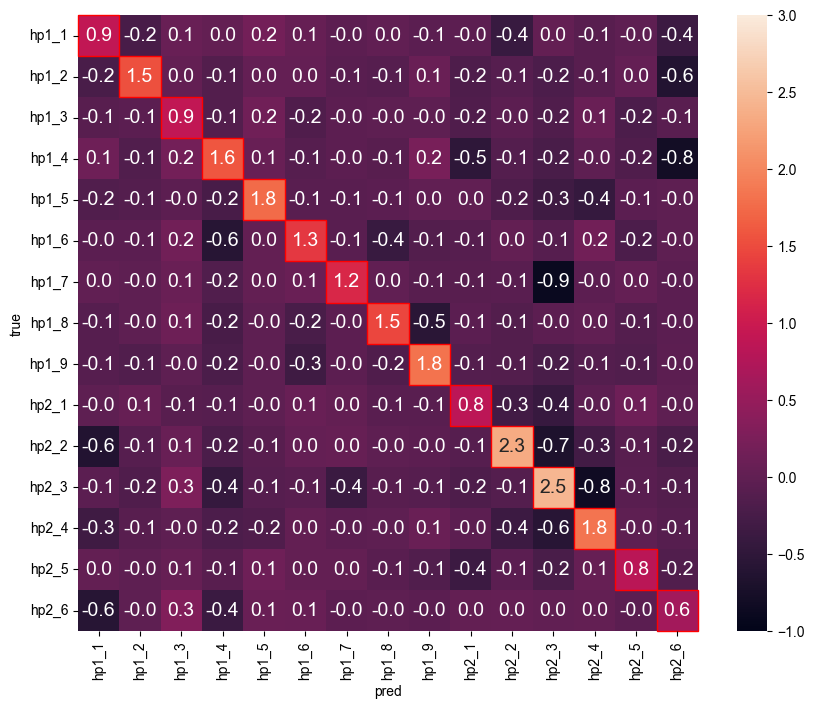

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(diff_df, annot=True, annot_kws={"size": 14.0}, fmt=".1f", ax=ax, vmin=-1, vmax=3,)
for i in range(len(diff_df)):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=1.0, clip_on=False))
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig("../../../05.figures/classification_for_real_data/hp12/hp12_clean_valid_cm_diff.pdf")